# Learning Objectives
- Evaluate performance of the selected model.
- Use k-fold cross validation to compare the performance of a pair of models.
-  Use repeated k-fold cross validation to compare the performance of a pair of models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('Secom.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, Sensor 1 to Target
dtypes: float64(122), int64(1), object(468)
memory usage: 7.1+ MB
None


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,43,44,45,46,47,48,50,51,53,54,55,56,57,58,75,76,77,78,79,80,81,82,83,89,90,92,93,103,104,118,136,144,145,146,147,148,150,151,152,153,154,155,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,190,191,192,193,194,195,210,211,212,213,214,215,216,217,218,224,225,227,228,238,239,253,270,271,279,280,281,282,283,285,286,287,288,289,290,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,326,327,328,329,330,331,348,349,350,351,352,353,354,355,356,362,363,365,366,376,377,391,408,409,417,418,419,420,421,423,424,425,426,427,428,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,462,463,464,465,466,467,482,483,484,485,486,487,488,489,490,496,497,499,500,510,

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,!,0.5005,0.0118,0.0035,2.363,!,!,!,!,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,!,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


In [2]:
data.describe()

,Sensor 14,Sensor 21,Sensor 43,Sensor 50,Sensor 53,Sensor 70,Sensor 75,Sensor 87,Sensor 88,Sensor 89,...,Sensor 528,Sensor 571,Sensor 572,Sensor 573,Sensor 574,Sensor 575,Sensor 576,Sensor 577,Sensor 578,Target
count,1564.0,1567.000000,1566.0,1566.0,1566.0,1561.0,1561.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,0.0,1.405054,70.0,1.0,0.0,1.0,0.002562,2.401872,0.982420,1807.815021,...,6.395717,530.523623,2.101836,28.450165,0.345636,9.162315,0.104729,5.563747,16.642363,0.933631
std,0.0,0.016737,0.0,0.0,0.0,0.0,0.101241,0.037332,0.012848,53.537262,...,1.888698,17.499736,0.275112,86.304681,0.248478,26.920150,0.067791,16.921369,12.485267,0.249005
min,0.0,1.179700,70.0,1.0,0.0,1.0,0.000000,2.242500,0.774900,1627.471400,...,2.170000,317.196400,0.980200,3.540000,0.066700,1.039500,0.023000,0.663600,4.582000,0.000000
25%,0.0,1.396500,70.0,1.0,0.0,1.0,0.000000,2.376850,0.975800,1777.470300,...,4.895450,530.702700,1.982900,7.500000,0.242250,2.567850,0.075100,1.408450,11.501550,1.000000
50%,0.0,1.406000,70.0,1.0,0.0,1.0,0.000000,2.403900,0.987400,1809.249200,...,6.410800,532.398200,2.118600,8.650000,0.293400,2.975800,0.089500,1.624500,13.817900,1.000000
75%,0.0,1.415000,70.0,1.0,0.0,1.0,0.000000,2.428600,0.989700,1841.873000,...,7.594250,534.356400,2.290650,10.130000,0.366900,3.492500,0.112150,1.902000,17.080900,1.000000
max,0.0,1.453400,70.0,1.0,0.0,1.0,4.000000,2.555500,0.993500,2105.182300,...,14.447900,589.508200,2.739500,454.560000,2.196700,170.020400,0.550200,90.423500,96.960100,1.000000


Question 1.1: Detect and replace missing values in the data with np.nan . Hint: missing data is noted as !

In [3]:
# Check for null data i.e. check for columns containing np.nan or None values
# res = data.isnull()

# for rowIndex, row in res.iterrows():
#     for columnIndex, value in row.items():
#         if value == True:
#             print(rowIndex, ", ", columnIndex, ": ", data.at[rowIndex,columnIndex])
            
# res.sum()

Sensor 1      0
Sensor 2      0
Sensor 3      0
Sensor 4      0
Sensor 5      0
Sensor 6      0
Sensor 7      0
Sensor 8      0
Sensor 9      0
Sensor 10     0
Sensor 11     0
Sensor 12     0
Sensor 13     0
Sensor 14     3
Sensor 15     0
Sensor 16     0
Sensor 17     0
Sensor 18     0
Sensor 19     0
Sensor 20     0
Sensor 21     0
Sensor 22     0
Sensor 23     0
Sensor 24     0
Sensor 25     0
Sensor 26     0
Sensor 27     0
Sensor 28     0
Sensor 29     0
Sensor 30     0
             ..
Sensor 562    0
Sensor 563    0
Sensor 564    0
Sensor 565    0
Sensor 566    0
Sensor 567    0
Sensor 568    0
Sensor 569    0
Sensor 570    0
Sensor 571    0
Sensor 572    0
Sensor 573    0
Sensor 574    0
Sensor 575    0
Sensor 576    0
Sensor 577    0
Sensor 578    0
Sensor 579    0
Sensor 580    0
Sensor 581    0
Sensor 582    0
Sensor 583    0
Sensor 584    0
Sensor 585    0
Sensor 586    0
Sensor 587    0
Sensor 588    0
Sensor 589    0
Sensor 590    0
Target        0
Length: 591, dtype: int6

In [27]:
data[data.eq("!").any(1)].head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target


In [5]:
# Strip white spaces before and after each string in all string columns
for col in data:
    if(data[col].dtype == object):
        data[col] = data[col].str.strip()
        
# Replace ? with np.nan
data.replace('!', np.NaN, inplace=True)

Question 1.2 Confirm that the change has worked

In [6]:
data[data.eq("!").any(1)]

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target


Question 1.3: Fill the missing values with zeroes

In [7]:
data.replace(np.NaN, 0, inplace=True)

In [8]:
#Validate that the missing values were replaced
res = data.isnull()

for rowIndex, row in res.iterrows():
    for columnIndex, value in row.items():
        if value == True:
            print(rowIndex, ", ", columnIndex, ": ", data.at[rowIndex,columnIndex])

In [9]:
res.sum()

Sensor 1      0
Sensor 2      0
Sensor 3      0
Sensor 4      0
Sensor 5      0
Sensor 6      0
Sensor 7      0
Sensor 8      0
Sensor 9      0
Sensor 10     0
Sensor 11     0
Sensor 12     0
Sensor 13     0
Sensor 14     0
Sensor 15     0
Sensor 16     0
Sensor 17     0
Sensor 18     0
Sensor 19     0
Sensor 20     0
Sensor 21     0
Sensor 22     0
Sensor 23     0
Sensor 24     0
Sensor 25     0
Sensor 26     0
Sensor 27     0
Sensor 28     0
Sensor 29     0
Sensor 30     0
             ..
Sensor 562    0
Sensor 563    0
Sensor 564    0
Sensor 565    0
Sensor 566    0
Sensor 567    0
Sensor 568    0
Sensor 569    0
Sensor 570    0
Sensor 571    0
Sensor 572    0
Sensor 573    0
Sensor 574    0
Sensor 575    0
Sensor 576    0
Sensor 577    0
Sensor 578    0
Sensor 579    0
Sensor 580    0
Sensor 581    0
Sensor 582    0
Sensor 583    0
Sensor 584    0
Sensor 585    0
Sensor 586    0
Sensor 587    0
Sensor 588    0
Sensor 589    0
Sensor 590    0
Target        0
Length: 591, dtype: int6

In [10]:
# Convert object type columns to float
for col in data:
    if(data[col].dtype == object):
        data[col] = data[col].astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, Sensor 1 to Target
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


Question 2.1: Split the data into Training and testing. Make your test size = 0.2 and your random_state = 42.

In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Question 2.2: Fit a logistic regression model on the training data. Predict the test data and plot the ROC curve

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', max_iter=1000)
lr.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000, solver='liblinear')

In [14]:
from sklearn.metrics import accuracy_score

y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy: ", acc_lr)

Accuracy:  0.8630573248407644


Plot ROC Curve

In [15]:
# ! pip install --upgrade pip --user
# ! pip install scikit-learn --upgrade --user
# ! pip install matplotlib --upgrade --user

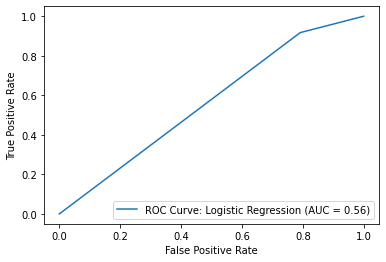

In [16]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_lr)

# Plot the ROC curve
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression')
display.plot()
plt.show()

Question 2.2: Apply RFE with a logistic regression model on the training data testing out different number of features. Predict the test data and plot the ROC curve.

Plot ROC Curve

Accuracy with 581 features: 0.8630573248407644


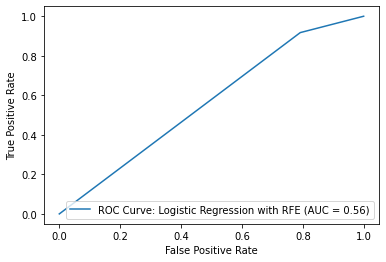

Accuracy with 571 features: 0.8630573248407644


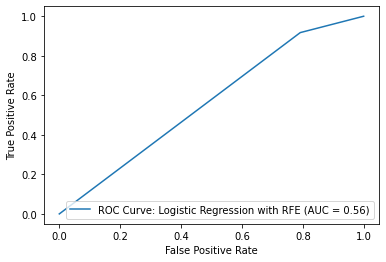

Accuracy with 561 features: 0.8662420382165605


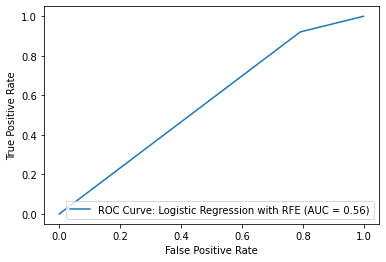

In [17]:
from sklearn.feature_selection import RFE
size = len(data.columns)

for i in range(1,4):
    est = LogisticRegression(solver='liblinear', max_iter=1000)
    n_features_to_select = size - (i*10) # Reduce features by 10 every iteration
    sel = RFE(est, n_features_to_select=n_features_to_select)
    sel.fit(X_train, y_train.values.ravel())
    y_pred = sel.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy with", n_features_to_select, "features:", acc)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    # Plot the ROC curve
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression with RFE')
    display.plot()
    plt.show()

Question 3.1: Apply stratisfied train test split to account for class imbalance

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

Question 3.2: Apply RFE with a logistic regression model on the stratisfied training data testing out different number of features. Predict the test data and plot the ROC curve.

In [19]:
regr = RFE(LogisticRegression(solver='liblinear', max_iter=1000), n_features_to_select=40, step=1)
regr.fit(X_train, y_train.values.ravel())

RFE(estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
    n_features_to_select=40)

Accuracy with stratified data: 0.9299363057324841


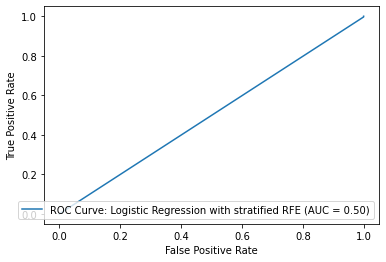

In [20]:
y_pred_rfe_str = regr.predict(X_test)
acc_rfe_str = accuracy_score(y_test, y_pred_rfe_str)
print("Accuracy with stratified data:", acc_rfe_str)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfe_str)
# Plot the ROC curve
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression with stratified RFE')
display.plot()
plt.show()

Question 4.1: Apply stratisfied K-Fold split where K=5 to the above data 

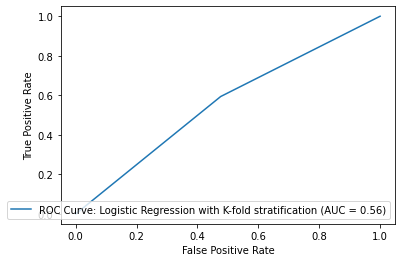

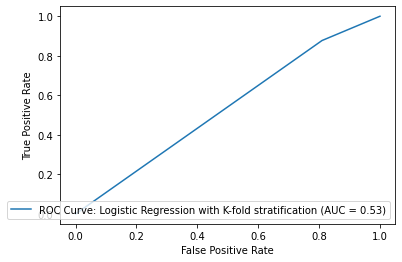

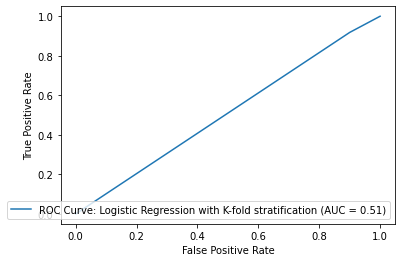

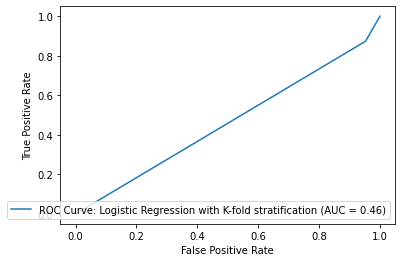

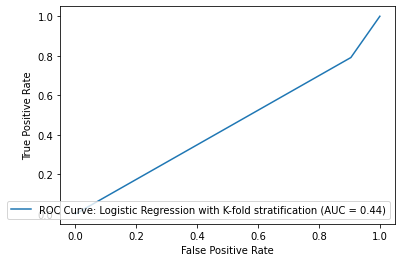

In [21]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold() # n_splits defaults to 5
lr_str = LogisticRegression(solver='liblinear', max_iter=1000)

for train_index, test_index in skf.split(X, y):
#     print("train index size:", len(train_index), "test index size:", len(test_index))
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr_str.fit(X_train_fold, y_train_fold.values.ravel())
    y_pred_valid = lr_str.predict(X_test_fold).reshape(-1,)
    fpr, tpr, thresholds = metrics.roc_curve(y_test_fold, y_pred_valid)
    # Plot the ROC curve
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression with K-fold stratification')
    display.plot()
    plt.show()

Implement the model and then create the ROC Curve

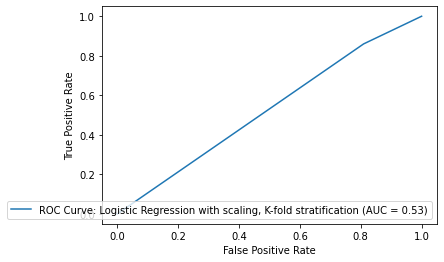

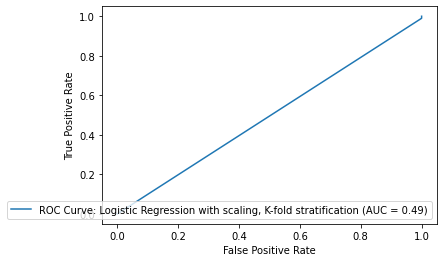

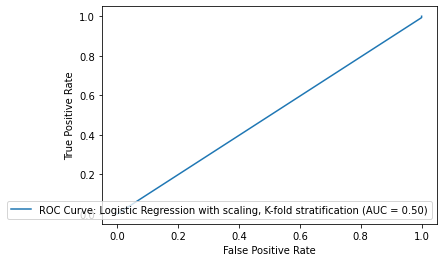

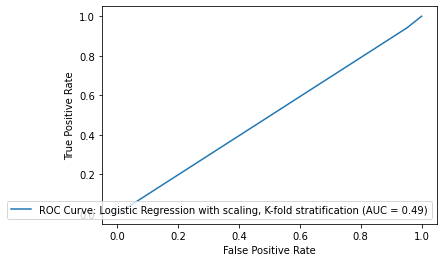

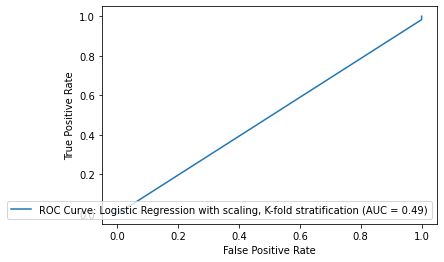

In [28]:
#  Repeating the above steps with scaling
from sklearn.preprocessing import MinMaxScaler

skf = StratifiedKFold() # n_splits defaults to 5
lr_str = LogisticRegression(solver='liblinear', max_iter=1000)
scores = []
    
for train_index, valid_index in skf.split(X, y):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        lr_str.fit(X_train,y_train.values.ravel())
        y_pred_valid = lr_str.predict(X_valid).reshape(-1,)
        scores.append(accuracy_score(y_valid, y_pred_valid))
        fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_pred_valid)
        # Plot the ROC curve
        roc_auc = metrics.auc(fpr, tpr)
        display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC Curve: Logistic Regression with scaling, K-fold stratification')
        display.plot()
        plt.show()

Implementing Bootstrapping

In [23]:
from sklearn.utils import resample

values = data.values
# configure bootstrap

n_iterations = 15
n_size = int(len(data) * 0.50)

In [24]:
# run bootstrap

stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    # fit model
    model = LogisticRegression(solver = 'liblinear', max_iter=1000)
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)

0.8527865404837014
0.8456659619450317
0.8665254237288136
0.8476190476190476
0.8431372549019608
0.8611691022964509
0.854602510460251
0.8773784355179705
0.8499475341028332
0.8438155136268344
0.8475991649269311
0.8268215417106652
0.83991683991684
0.8378947368421052
0.8350622406639004


In [25]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100 #2.5%
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100 #97.5%
upper = min(1.0, np.percentile(stats, p))
print('%.1f%% confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0% confidence interval 83.0% and 87.4%


Question 4.2: Summarize your findings of all above models

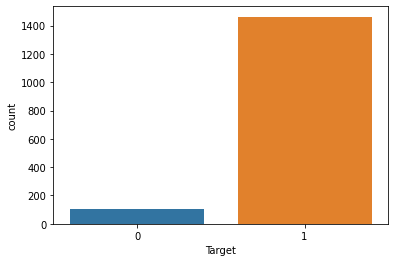

In [29]:
import seaborn as sns
sns.countplot(x='Target',data=data)
plt.show()

The model that has the best accuracy is the one with the stratified data set and RFE eliminating 40 of the features. Accuracy is at 92% but AUC is 0.5. Accuracy without stratifying data gives lower accuracy but slightly better AUC of 0.56. K-fold's AUC value is the same 0.5 with and without scaling. 
Scaling I believe is only helping coefficients converge faster doesn't do anything to improve model fit.
Performance in terms of accuracy is improving with more features being eliminated but AUC isn't improving. This is because as seen in the above graph, the dataset is imbalanced, there are more target=1 samples when compared to target=0. Applying SMOTE to the data (or ROSE?) might help. 
This is imbalance is also addressed by stratifying the train test samples.

<h3> Question 5. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

Incoming experience: No incoming experience apart from previous assignments
Steps taken: This week's lesson was about cross validation and bootstrapping. Implemented both on the data set to get a deeper understanding of both concepts
Obstacles: Had to play around a bit with the solver and max iteration parameters for LR models because the co-efficients weren't converging. Ended up checking model with all solvers and iterations of 500, 1000 and 2000.
Link to real world: I think bootstrapping especially helps when the data set is smaller and helps train the model without too much overfitting because of the random samples. Learnt the importance of validating the trained model.
Steps missing (with just this week's learning): I thought scaling might help the model, and wanted to see how it works with k-fold cross validation and in a pipeline along with how bootstrapping works in code.